In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [107]:
def resizeplot(l,a):
    plt.figure(figsize=(l,a))

In [108]:
#Data uploading
titanic = pd.read_csv('titanic-passengers.csv',sep=';')

#Nuber of columns and rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [109]:
#information about columns
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [110]:
#Informations about numerical variables
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [111]:
# Data checking for missing values

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data preprocessing : We'll start by droping some columns judge less important like the name, passengerId and the ticket.
We are going to drop the column "cabin" because it misses too much information

In [112]:
columns_to_drop = ['Name','PassengerId', 'Ticket', 'Cabin']
titanic = titanic.drop(columns_to_drop, axis = 1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,2,male,28.0,0,0,13.0000,S
1,No,3,male,25.0,0,0,7.6500,S
2,No,3,male,20.0,0,0,7.8542,S
3,No,3,female,29.0,0,4,21.0750,S
4,No,1,male,31.0,1,0,52.0000,S


Some values are still missing in the columns "Age" and "Embarked". We are going to analyze them and fill with the appropriate method the missing values.

We are going to start with ages. In our describing function, we noticed the "min", "mean" and "max" for the column "Age".To better handle this column, we are going to categorize the age values to categories like "Infant", "kid", "young", "adult" and "old".

In [113]:
# We are going to use the pd.cut() function to categorize the column Age.

bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
titanic['Age'] = pd.cut(titanic['Age'], bins = bins, labels=labels)

<AxesSubplot:xlabel='Age', ylabel='count'>

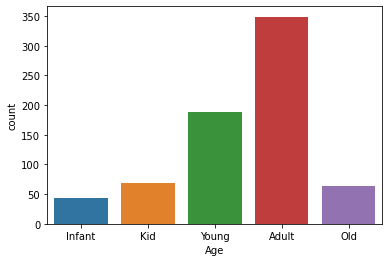

In [99]:
# Let's visualize the new manipulation

sns.countplot(x = 'Age', data = titanic)

That plot reveals some outliers like "old, kid and infant". the number of adult category is nearly the double of young category. So the best way for us to fill our missing values is to use the mode. That because the mean age as calculated above matches with the "adult" category.

In [114]:
titanic['Age'].fillna(titanic['Age'].mode()[0],inplace = True)

As we are done with the "Age" column, we're going to engage with the embarked one. With this column, our data is already categorized. So we'll keep the same process as we did with the "Age" column.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

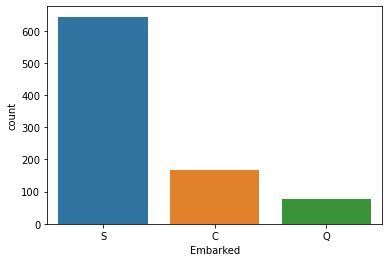

In [101]:
# Let's visualize the column

sns.countplot(x = 'Embarked', data = titanic)

In [115]:
# We are going to use the mode function to fill our missing values in that column

titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace = True)

Now we are done with missing values. To move forward, we are going to convert our categorical columns to some numeric ones. 

In [116]:
# Data verification

titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [117]:
dummies = ['Sex','Age', 'Embarked']
cleanup = {"Survived":{"Yes":1,"No":0}}
titanic.replace(cleanup, inplace = True)
one_hot = pd.get_dummies(titanic[dummies])

titanic = titanic.drop(dummies, axis=1)
titanic = pd.concat([titanic, one_hot], axis = 1)
titanic

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Age_Infant,Age_Kid,Age_Young,Age_Adult,Age_Old,Embarked_C,Embarked_Q,Embarked_S
0,0,2,0,0,13.0000,0,1,0,0,0,1,0,0,0,1
1,0,3,0,0,7.6500,0,1,0,0,1,0,0,0,0,1
2,0,3,0,0,7.8542,0,1,0,0,1,0,0,0,0,1
3,0,3,0,4,21.0750,1,0,0,0,0,1,0,0,0,1
4,0,1,1,0,52.0000,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,0,30.0708,1,0,0,1,0,0,0,1,0,0
887,0,3,0,0,7.2292,0,1,0,0,1,0,0,1,0,0
888,0,3,0,0,8.6625,1,0,0,0,0,1,0,0,0,1
889,0,3,0,0,7.8958,0,1,0,0,0,1,0,0,0,1


In [118]:
titanic.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Age_Infant,Age_Kid,Age_Young,Age_Adult,Age_Old,Embarked_C,Embarked_Q,Embarked_S
0,0,2,0,0,13.0000,0,1,0,0,0,1,0,0,0,1
1,0,3,0,0,7.6500,0,1,0,0,1,0,0,0,0,1
2,0,3,0,0,7.8542,0,1,0,0,1,0,0,0,0,1
3,0,3,0,4,21.0750,1,0,0,0,0,1,0,0,0,1
4,0,1,1,0,52.0000,0,1,0,0,0,1,0,0,0,1


Now we can attest that our dataset is ready to feed our model.

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

In [126]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [121]:
#features extraction

x = titanic.drop('Survived', axis = 1) 
y = titanic['Survived']

#data splitting with test_size of 25%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

logreg = LogisticRegression()   #build our logistic model

logreg.fit(x_train, y_train)  #fitting training data

y_pred  = logreg.predict(x_test)    #testing model’s performance

print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.85


C:\Users\pc-hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

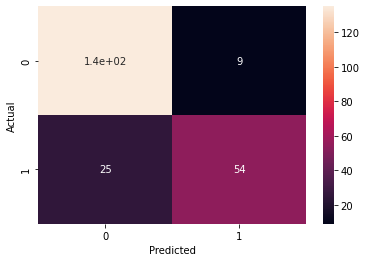

In [122]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [123]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       144
           1       0.86      0.68      0.76        79

    accuracy                           0.85       223
   macro avg       0.85      0.81      0.82       223
weighted avg       0.85      0.85      0.84       223



In [124]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[135,   9],
       [ 25,  54]], dtype=int64)

ROC

ROC stands for Receiver Operating Characteristic Curve, a graph that shows the performance of binary classification models. It is used to plot two parameters which are the true positive rate and the false positive rate:

-True Positive Rate = Total Positive / Total Positive + False Negative

-False Positive Rate = False Positive / False Positive + True Negative

AUC

AUC stands for Area under the ROC Curve. It calculates the entire two-dimensional area present under the ROC curve.
The AUC is between 0 and 1. A classification model with 100% bad predictions will have an AUC score of 0.0, while a classification model with 100% true predictions will represent the AUC score of 1.0.

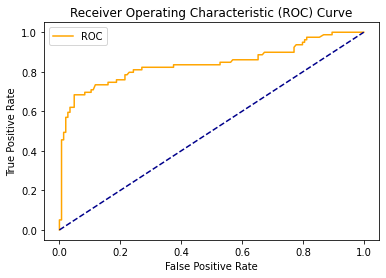

In [127]:
# predict probabilities

probs = logreg.predict_proba(x_test)  

# keep probabilities for the positive outcome only

probs = probs[:, 1]  



fper, tper, thresholds = roc_curve(y_test, probs) 



plot_roc_cur(fper, tper)

In [130]:
# AUC score

auc_score = roc_auc_score(y_test, probs)
auc_score

0.8401898734177216